In [1]:
import pandas as pd
import seaborn as sns
color_pal = sns.color_palette()
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nikhil-xyz/datasets/main/train_data.csv')

In [3]:
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [4]:
df.tail()

,Date,Petrol (USD)
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61
812,12/31/2018,120.18


In [5]:
test_df = pd.read_csv('https://raw.githubusercontent.com/nikhil-xyz/datasets/main/test_data.csv')

In [6]:
test_df

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN
5,1/6/2019,NaN
6,1/7/2019,NaN
7,1/8/2019,NaN
8,1/9/2019,NaN
9,1/10/2019,NaN


In [7]:
df = df.set_index('Date')

In [8]:
df.describe()

,Petrol (USD)
count,811.000000
mean,110.330481
std,19.241182
min,74.210000
25%,94.525000
50%,112.420000
75%,128.560000
max,189.510000


In [9]:
df.index = pd.to_datetime(df.index)

<Axes: title={'center': 'Petrol Price Forecasting'}, xlabel='Date'>

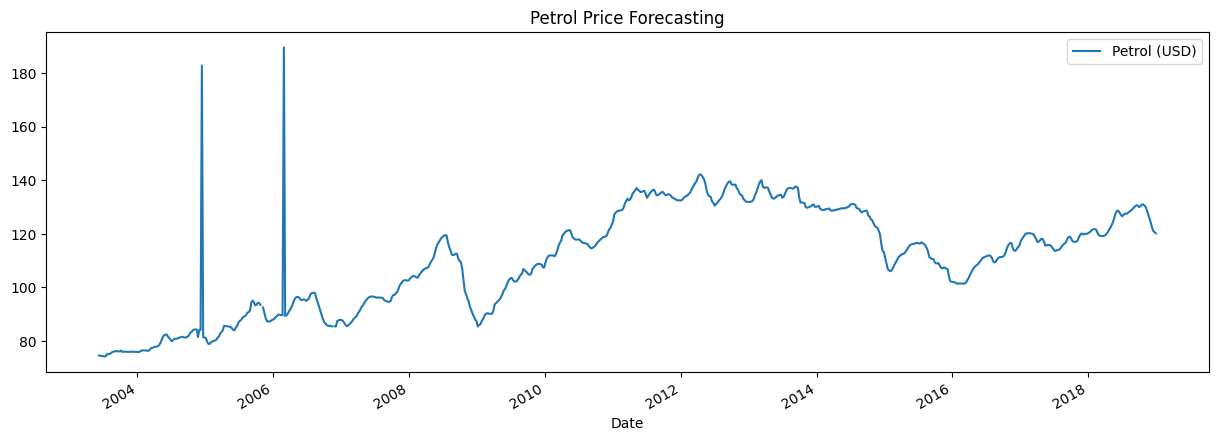

In [10]:
df.plot(figsize=(15,5), title='Petrol Price Forecasting')

In [11]:
df.style.format({"Date": lambda t: t.strftime("%d-%m-%Y")})

,Petrol (USD)
Date,
2003-06-09 00:00:00,74.590000
2003-06-16 00:00:00,74.470000
2003-06-23 00:00:00,74.420000
2003-06-30 00:00:00,74.350000
2003-07-07 00:00:00,74.280000
2003-07-14 00:00:00,74.210000
2003-07-21 00:00:00,75.070000
2003-07-28 00:00:00,75.100000
2003-08-04 00:00:00,75.120000


In [12]:
df.index

DatetimeIndex(['2003-06-09', '2003-06-16', '2003-06-23', '2003-06-30',
               '2003-07-07', '2003-07-14', '2003-07-21', '2003-07-28',
               '2003-08-04', '2003-08-11',
               ...
               '2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-17',
               '2018-12-24', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=813, freq=None)

In [13]:
df.isna().sum()

Petrol (USD)    2
dtype: int64

In [14]:
df[df['Petrol (USD)'].isna()]

,Petrol (USD)
Date,
2005-10-31,NaN
2006-11-20,NaN


In [15]:
df = df.ffill()

In [16]:
df[df['Petrol (USD)'].isna()]

,Petrol (USD)
Date,


<Axes: title={'center': 'Petrol price forecasting'}, xlabel='Date'>

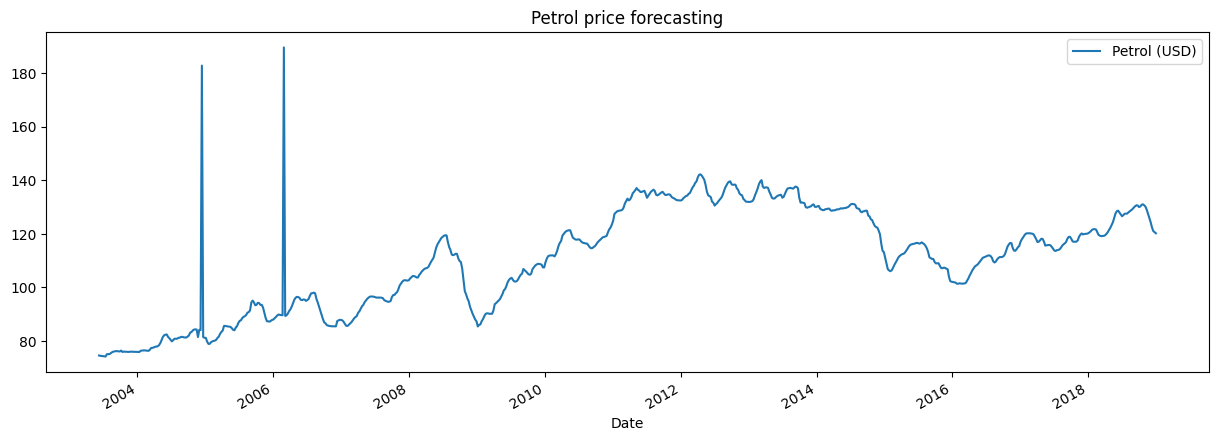

In [17]:
df.plot(figsize=(15, 5), title='Petrol price forecasting')

In [18]:
df.isna().sum()

Petrol (USD)    0
dtype: int64

#Handling outliers

In [19]:
df.loc[df['Petrol (USD)'] > 160] = np.nan

In [20]:
df.isna().sum()

Petrol (USD)    2
dtype: int64

In [21]:
df[df['Petrol (USD)'].isna()]

,Petrol (USD)
Date,
2004-12-13,NaN
2006-02-27,NaN


In [22]:
df = df.ffill()

In [23]:
df.isna().sum()

Petrol (USD)    0
dtype: int64

<Axes: title={'center': 'Petrol Price Forecasting'}, xlabel='Date'>

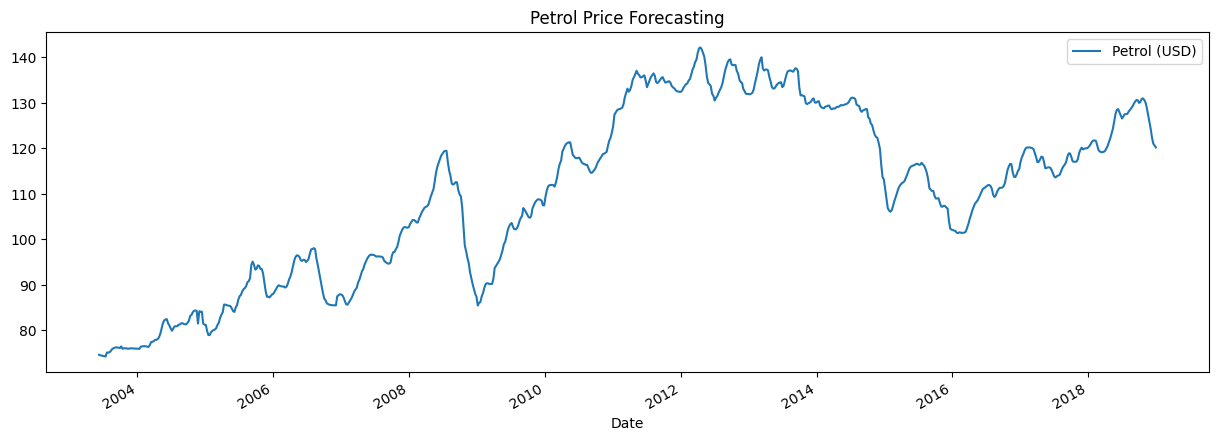

In [24]:
df.plot(figsize=(15, 5), title = 'Petrol Price Forecasting')

In [25]:
df.describe()

,Petrol (USD)
count,813.000000
mean,110.034932
std,18.908641
min,74.210000
25%,94.370000
50%,112.220000
75%,128.430000
max,142.170000


In [26]:
df.head()

,Petrol (USD)
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28


In [27]:
df= df['Petrol (USD)'].resample('MS').sum()

In [28]:
df.head()

Date
2003-06-01    297.83
2003-07-01    298.66
2003-08-01    302.42
2003-09-01    380.79
2003-10-01    304.38
Freq: MS, Name: Petrol (USD), dtype: float64

In [29]:
df.index

DatetimeIndex(['2003-06-01', '2003-07-01', '2003-08-01', '2003-09-01',
               '2003-10-01', '2003-11-01', '2003-12-01', '2004-01-01',
               '2004-02-01', '2004-03-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=187, freq='MS')

In [30]:
df = pd.DataFrame(df)

In [31]:
df.head()

,Petrol (USD)
Date,
2003-06-01,297.83
2003-07-01,298.66
2003-08-01,302.42
2003-09-01,380.79
2003-10-01,304.38


In [32]:
df['month'] = df.index.month
df['quarter'] = df.index.quarter

[]

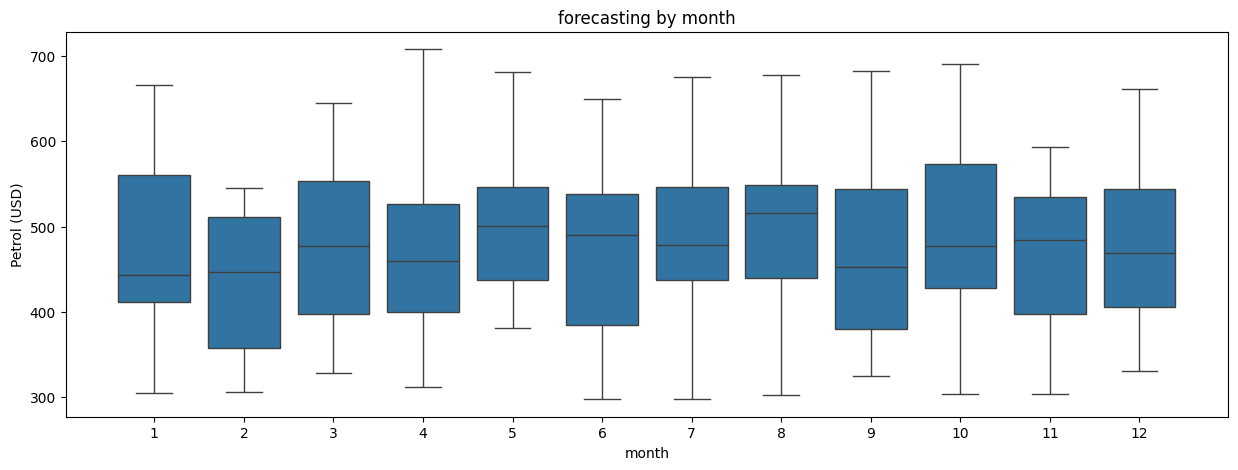

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data = df, x = 'month', y = 'Petrol (USD)')
ax.set_title('forecasting by month')
plt.plot()

there is no correlation between month and petrol price

[]

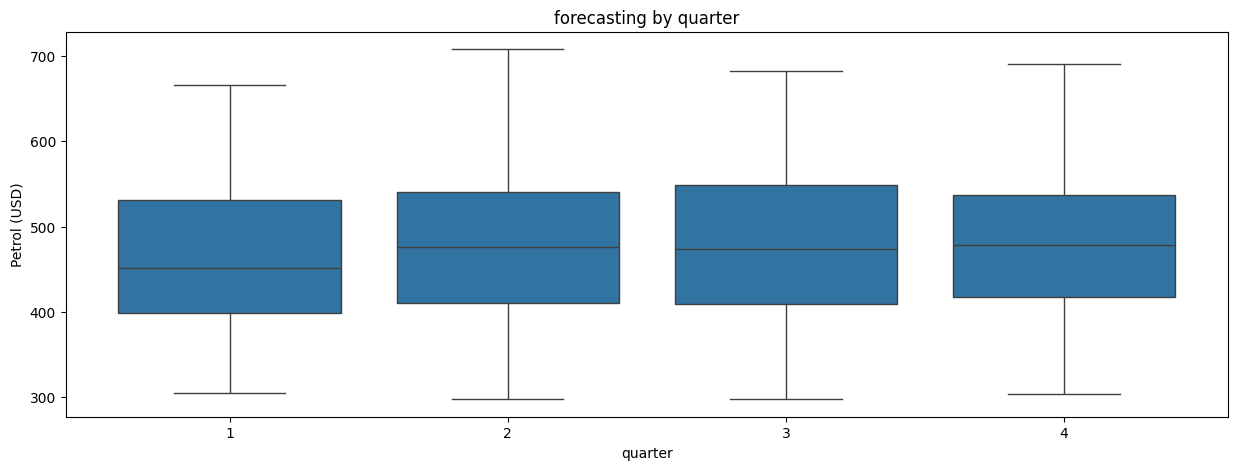

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data = df, x = 'quarter', y = 'Petrol (USD)')
ax.set_title('forecasting by quarter')
plt.plot()

no correlation of price can be observed with respect to quarter as well

In [35]:
df.head()

,Petrol (USD),month,quarter
Date,,,
2003-06-01,297.83,6,2
2003-07-01,298.66,7,3
2003-08-01,302.42,8,3
2003-09-01,380.79,9,3
2003-10-01,304.38,10,4


In [36]:
df.drop(columns=['month', 'quarter'], inplace=True)

In [37]:
df.head()

,Petrol (USD)
Date,
2003-06-01,297.83
2003-07-01,298.66
2003-08-01,302.42
2003-09-01,380.79
2003-10-01,304.38


<Axes: title={'center': 'Petrol Price'}, xlabel='Date'>

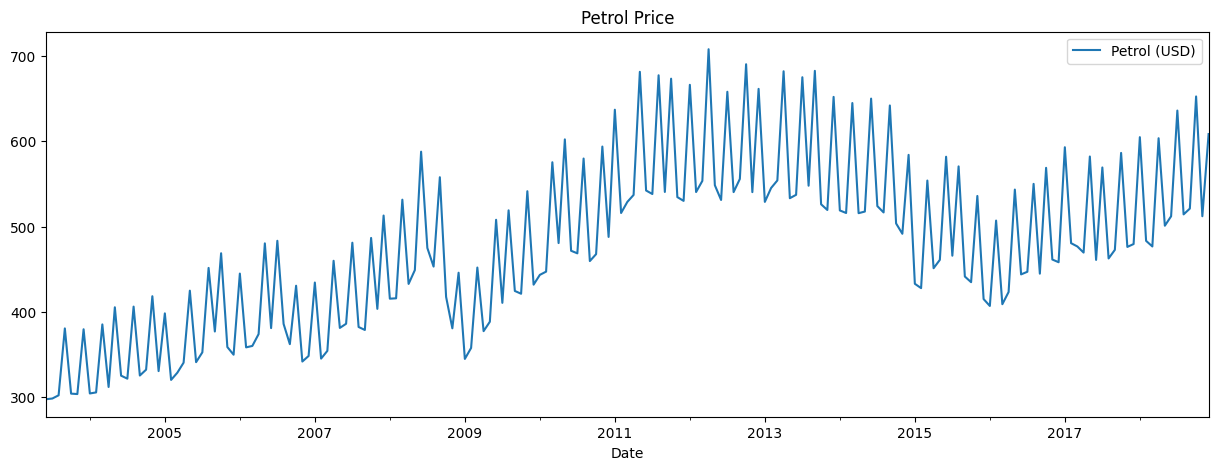

In [38]:
df.plot(figsize=(15, 5), title='Petrol Price')

In [39]:
import statsmodels.api as sm

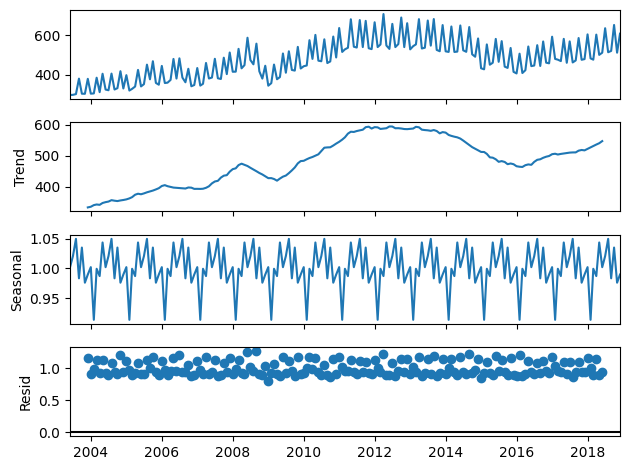

In [40]:
decomposition = sm.tsa.seasonal_decompose(df, model='multiplicative')
fig = decomposition.plot()
plt.show()

In [41]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df)
adftest[1]

0.469116683595041

In [42]:
# df1 = df - df.shift(1)
df1 = df.diff()

<Axes: xlabel='Date'>

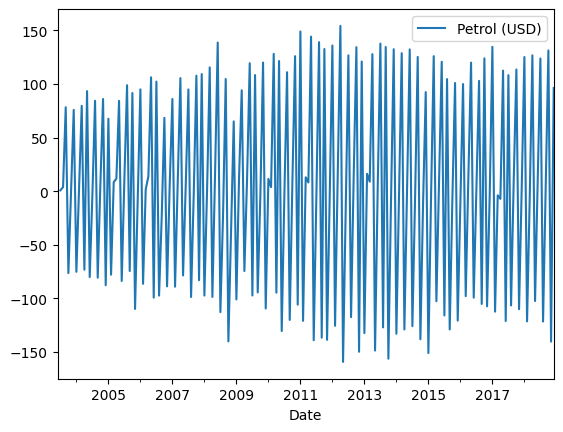

In [43]:
df1.plot()

In [44]:
df1[df1['Petrol (USD)'].isna()]
df1 = df1.bfill()

In [45]:
df1.isna().sum()

Petrol (USD)    0
dtype: int64

In [46]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df1)
adftest[1]

0.021553706795609234

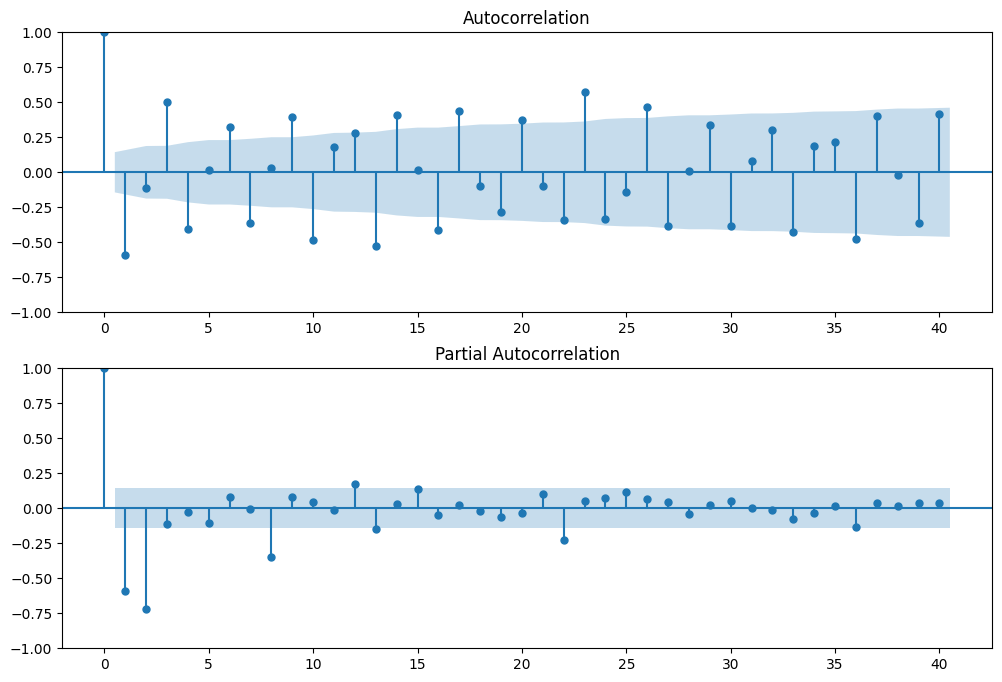

In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1.iloc[1:],lags=40,ax=ax2)

c:\Users\nikhil\.conda\envs\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

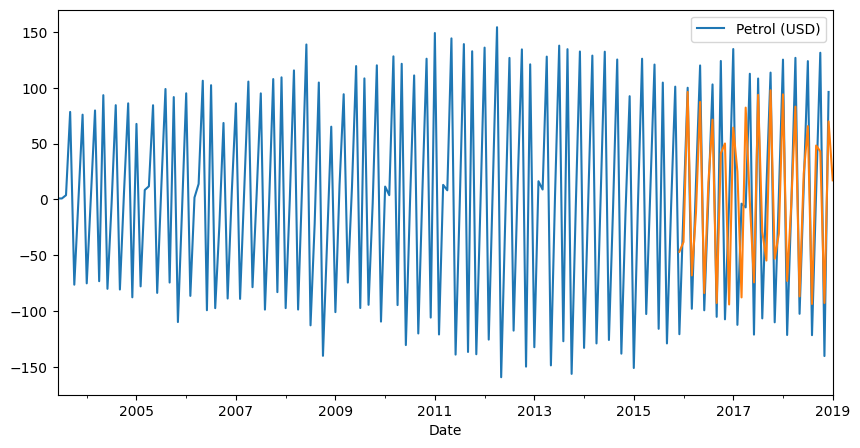

In [48]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df1,order=(3,0,3))
model_fit=model.fit()
ts1=model_fit.predict(start=150,end=187,dynamic=True)
df1.plot(figsize=(10,5))
ts1.plot()

In [62]:
print(df)

            Petrol (USD)
Date                    
2003-06-01        297.83
2003-07-01        298.66
2003-08-01        302.42
2003-09-01        380.79
2003-10-01        304.38
...                  ...
2018-08-01        514.38
2018-09-01        521.18
2018-10-01        652.56
2018-11-01        512.22
2018-12-01        608.48

[187 rows x 1 columns]


c:\Users\nikhil\.conda\envs\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

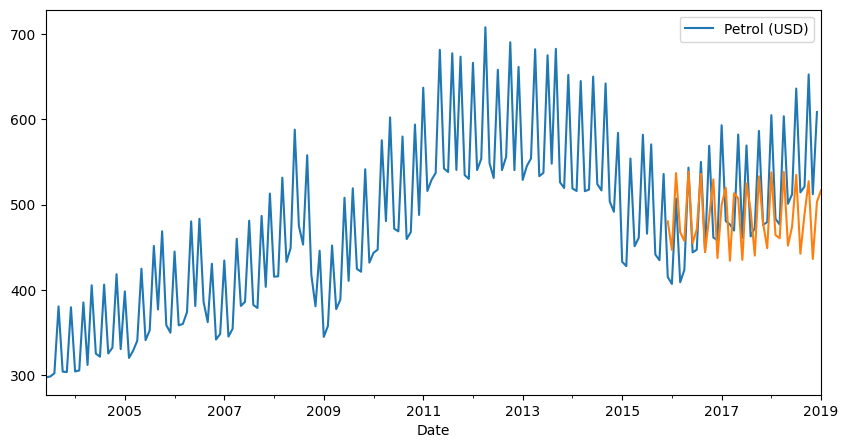

In [49]:
model=ARIMA(df,order=(3,1,3))
model_fit=model.fit()
ts=model_fit.predict(start=150,end=187,dynamic=True)
df.plot(figsize=(10,5))
ts.plot()

<Axes: xlabel='Date'>

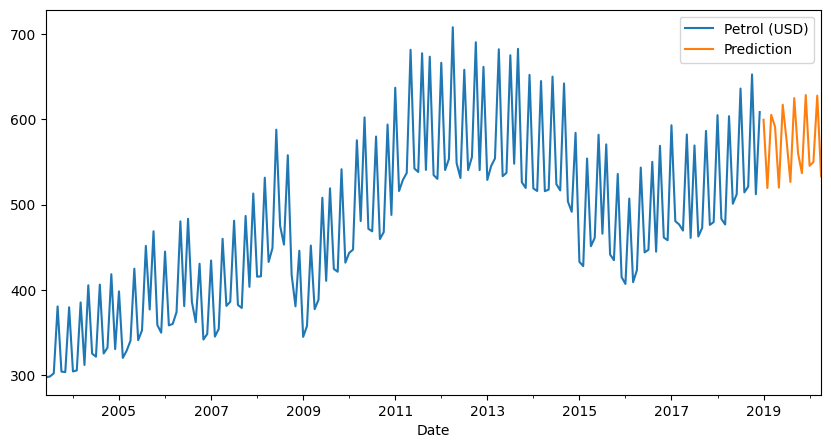

In [50]:
predictions = model_fit.predict(len(df), len(df)+15)
df.plot(legend=True, label='Train', figsize=(10,5))
predictions.plot(legend=True, label='Prediction')


In [51]:
predictions

2019-01-01    599.492256
2019-02-01    519.460076
2019-03-01    605.268070
2019-04-01    591.116231
2019-05-01    520.000156
2019-06-01    617.074292
2019-07-01    575.572674
2019-08-01    526.633050
2019-09-01    624.791513
2019-10-01    560.049413
2019-11-01    536.879667
2019-12-01    628.451147
2020-01-01    545.563585
2020-02-01    549.997900
2020-03-01    627.742415
2020-04-01    533.267405
Freq: MS, Name: predicted_mean, dtype: float64

In [52]:
result = pd.DataFrame(predictions)
result.columns = ['Prediction']
result = result.rename_axis('Date')
result

,Prediction
Date,
2019-01-01,599.492256
2019-02-01,519.460076
2019-03-01,605.268070
2019-04-01,591.116231
2019-05-01,520.000156
2019-06-01,617.074292
2019-07-01,575.572674
2019-08-01,526.633050
2019-09-01,624.791513


Prepared data

In [53]:
import os

In [54]:
output_file1 = os.path.join('preprocessed_data', 'train.csv')
output_file2 = os.path.join('preprocessed_data', 'test.csv')

In [55]:
os.makedirs(os.path.dirname(output_file1), exist_ok=True)

In [56]:
df.to_csv(output_file1)
test_df.to_csv(output_file2)

In [57]:
from zipfile import ZipFile, ZIP_DEFLATED
from pathlib import Path

In [58]:
zip_path = './preprocessed_data.zip'
directory_to_zip = './preprocessed_data/'

In [59]:
directory_to_zip

'./preprocessed_data/'

In [60]:
folder = Path(directory_to_zip)
with ZipFile(zip_path, 'w', ZIP_DEFLATED) as zip:
    for file in folder.iterdir():
        zip.write(file)

In [63]:
df.head()

,Petrol (USD)
Date,
2003-06-01,297.83
2003-07-01,298.66
2003-08-01,302.42
2003-09-01,380.79
2003-10-01,304.38


In [68]:
df.isna().sum()

Petrol (USD)    0
dtype: int64

In [69]:
df.index

DatetimeIndex(['2003-06-01', '2003-07-01', '2003-08-01', '2003-09-01',
               '2003-10-01', '2003-11-01', '2003-12-01', '2004-01-01',
               '2004-02-01', '2004-03-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=187, freq='MS')